Importing libraries

In [537]:
import numpy as np
import sympy as sp
import os
from queue import PriorityQueue
import matplotlib.pyplot as mp

Note: workspace is a rectangle of width b = 400 mm and height h = 250 mm

Variables:
C2C
C2G
closed_list
open _list
initial_node
goal_node
obstacle_space usign matrix and geometric equations
action_set --> N(1),S(1), E(1), W(1), NE(1.5), NW, SE, SW



Data set for each node (can be changed)

Creating the workspace with all default values as once

In [538]:

#node size ratio (unit/node)
def map():
    global x_size, y_size, map_def, Rat,L
    Rat = 1 #unit per node
    L=1
    x_size = int(400/Rat)
    y_size = int(250/Rat)
    map_def = np.zeros((y_size,x_size,12))
    map_def[:,:,:] = -2

Defining obstacle space

Correct the equations

Circle

In [539]:
#x is colum and y is row
def circle_obs():
    global x_c, y_c, x_nc, y_nc, map_obs1, allp_map
    x_c = []
    y_c = []
    x_nc = []
    y_nc = []
    y_centre = int((249 - 65)/Rat)
    x_centre = int((399 - 100)/Rat)
    radius_c = int(55/Rat)
    radius = int(40/Rat)
    map_obs1 = np.copy(map_def)
    for x in range(int(200/Rat),int(380/Rat)):
        for y in range(int(100/Rat), int(250/Rat)):
            if (np.sqrt((x-x_centre)**2 + (y-y_centre)**2)) < radius_c:
                map_obs1[y, x,:] = -1
                x_c.append(x)
                y_c.append(y)
                allp_map.append([x,y])
            if (np.sqrt((x-x_centre)**2 + (y-y_centre)**2)) < radius:
                x_nc.append(x)
                y_nc.append(y)


Triangles

In [540]:
def triang_obs():
    global x_t1, y_t1, x_t1_nc, y_t1_nc, map_obs2, x_t2_nc, y_t2_nc, x_t2, y_t2, allp_map
    y1 = sp.symbols('y1')
    x1 = sp.symbols('x1')
    y2 = sp.symbols('y2')
    x2 = sp.symbols('x2')
    y3 = sp.symbols('y3')
    x3 = sp.symbols('x3')
    y4 = sp.symbols('y4')
    x4 = sp.symbols('x4')
    y5 = sp.symbols('y5')
    x5 = sp.symbols('x5')

    e1 = y1 - (-5/54)*x1 - 187.87
    e2 = y2 - (-85/69)*x2 - (15681/69) +18 #222.7
    e2_nc = y2 - (-85/69)*x2 - 15681/69 #15681/69
    e3 = y3 - (-16/5)*x3 - (2169/5) -25 #543.25
    e3_nc = y3 - (-16/5)*x3 - 2169/5
    e4 = y4 - (6/7)*x4 - (779/7) + 15
    e4_nc = y4 - (6/7)*x4 - 779/7
    e5 = y5 - (25/79)*x5 - (13661/79) -15
    e5_nc = y5 - (25/79)*x5 - 13661/79
    x_t1 = []
    y_t1 = []
    x_t2 = []
    y_t2 = []
    x_t1_nc = []
    y_t1_nc = []
    x_t2_nc = []
    y_t2_nc = []
    map_obs2 = np.copy(map_obs1)
    for x in range(int(140/Rat)):
        for y in range(int(40/Rat),int(220/Rat)):
            if e1.subs([(x1,x),(y1,y)])<=0 and e2.subs([(x2,x),(y2,y)])>=0 and e3.subs([(x3,x),(y3,y)])<=0 :
                map_obs2[y,x,:] = -1
                x_t1.append(x)
                y_t1.append(y)
                allp_map.append([x,y])
            if e1.subs([(x1,x),(y1,y)])<=0 and e2_nc.subs([(x2,x),(y2,y)])>=0 and e3_nc.subs([(x3,x),(y3,y)])<=0 :
                x_t1_nc.append(x)
                y_t1_nc.append(y)
            if e1.subs([(x1,x),(y1,y)])>=0 and e4.subs([(x4,x),(y4,y)])>=0 and e5.subs([(x5,x),(y5,y)])<=0:
                map_obs2[y,x,:] = -1
                x_t2.append(x)
                y_t2.append(y)
                allp_map.append([x,y])
            if e1.subs([(x1,x),(y1,y)])>=0 and e4_nc.subs([(x4,x),(y4,y)])>=0 and e5_nc.subs([(x5,x),(y5,y)])<=0:
                x_t2_nc.append(x)
                y_t2_nc.append(y)


Chekc the clearance again

Hexagon

In [541]:
def hex_obs():
    global map_obs4, x_h, y_h, x_h_nc, y_h_nc, allp_map
    y6 = sp.symbols('y6')
    x6 = sp.symbols('x6')
    y7 = sp.symbols('y7')
    x7 = sp.symbols('x7')
    y8 = sp.symbols('y8')
    x8 = sp.symbols('x8')
    y9 = sp.symbols('y9')
    x9 = sp.symbols('x9')
    x10 = sp.symbols('x10')
    x11 = sp.symbols('x11')

    e6 = y6 - (5/8)*x6 + 81
    e6_nc = y6 - (4/7)*x6 + 380/7
    e10 = x10 - 249
    e10_nc = x10 - 234
    e7 = y7 + (5/8)*x7 - 281
    e7_nc = y7 + (4/7)*x7 - 1780/7
    e8 = y8 - (5/8)*x8 - 31
    e8_nc = y8 - (4/7)*x8 - 180/7
    e11 = x11 - 150
    e11_nc = x11 - 164
    e9 = y9 + (5/8)*x9 - 169
    e9_nc = y9 + (4/7)*x9 - 1220/7
    x_h = []
    y_h = []
    x_h_nc = []
    y_h_nc = []
    map_obs4 = np.copy(map_obs2)
    for x in range(int(100/Rat), int(300/Rat)):
        for y in range(int(30/Rat),int(255/Rat)):
            if e6.subs([(x6,x),(y6,y)])>=0 and e7.subs([(x7,x),(y7,y)])<=0 and e8.subs([(x8,x),(y8,y)])<=0 and e9.subs([(x9,x),(y9,y)])>=0 and e10.subs([(x10,x)])<=0 and e11.subs([(x11,x)])>=0:
                map_obs4[y,x,:] = -1
                x_h.append(x)
                y_h.append(y)
                allp_map.append([x,y])
            if e6_nc.subs([(x6,x),(y6,y)])>=0 and e7_nc.subs([(x7,x),(y7,y)])<=0 and e8_nc.subs([(x8,x),(y8,y)])<=0 and e9_nc.subs([(x9,x),(y9,y)])>=0 and e10_nc.subs([(x10,x)])<=0 and e11_nc.subs([(x11,x)])>=0:
                x_h_nc.append(x)
                y_h_nc.append(y)


The main algorithm

Data structure

In [542]:
class Node:
    def __init__(self, node_id, node_loc, parent_id, cost, c2c , c2g):
        self.parent_id = parent_id #
        self.node_id = node_id #unique node id for each node
        self.node_loc = node_loc ## [y,x,angle]
        self.total_cost = round(cost,2)
        self.c2c= round(c2c,2)
        self.c2g=round(c2g,2)

Creating required list for storing node information

Initialize the goal node

Remember x is column and y is rows, a is row and b is column

2) Update the value at the matrix space to node id itself when visited

In [543]:
def pop(Closed_list, Open_list, All_list):
    dat = Open_list.get()
    #dat[0] is c2c+c2g, dat[1] is Node_id--> starts from 1, list starts from 0 
    Closed_list.append(All_list[dat[1]-1]) #indexing the node from the all_list  
    ##check for goal
    print('closed list updated')
    if All_list[dat[1]-1].node_loc==goal_location:
        return "Goal found"
    return All_list[dat[1]-1]
#node = pop(Closed_list, Open_list)

Cost Dictionary

In [544]:
cost_direction = {'S': 1, 'D': 1}

Parameter update

In [545]:
def param(All_list, Open_list, map_obs4, cost_dir, n_c, n_d,ang, node):
     id = All_list[-1].node_id + 1
     map_obs4[n_c,n_d,int(ang/30)] = id  ## id is put in map
     c2_g=c2g([n_c,n_d],goal_location[0:2])
     c2c=node.c2c+cost_dir
     cost = c2c+c2_g  #cost_dir is a dictionary
     
     parent = node.node_id
     loc = [n_c, n_d, int(ang/30)]
     # print('node at id', id, 'cost is', cost, 'loc', loc)
     All_list.append(Node(id, loc, parent, cost, c2c,c2_g)) ## node is created
     tup_new = [cost, id]
     Open_list.put(tup_new) ## list of [cost, id] ###gives the [cost,id] in priority queue open list

List cost update function

In [546]:
def cost_update(nod, n_c ,n_d, ang, All_list,  Closed_list, Open_list, map_obs4, cost_dir):
     index = int(map_obs4[n_c, n_d, int(ang/30)])
     if round((nod.cost + cost_dir),1)< round(All_list[index-1].cost,1): #since index/node_id is starting from 1
            All_list[index-1].cost = round((nod.cost + cost_dir),1)
            All_list[index-1].parent_id = nod.node_id
            # print('updated cost of node', index, 'is', All_list[index-1].cost)
            for i in Closed_list:
                if i.node_id ==index:
                        i.cost = round((nod.cost + cost_dir),1)
                        i.parent_id = nod.node_id
            if Open_list.qsize() > 0:
                for j in Open_list.queue:
                    if j[1] ==index:
                            j[0] = round((nod.cost + cost_dir),1)
                            # i.parent_id = nod.node_id  

Check if goal function

In [547]:

def check_if_goal(goal_loc, A_list, go_cost):
    # print('checking goal')
    if goal_loc==A_list[-1].node_loc:
        go_cost = A_list[-1].cost #updates the goal cost
        print('goal cost is', go_cost)
        return go_cost
    else:
        return None


array([-2.,  2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.])

In [549]:
def move_zero(node, All_list, Open_list, k):
    a,b, node_k =node.node_loc
    angle=node_k*30
    ang=(angle+k*30)%360
    c= a + L*np.cos(ang)
    d= b + L*np.sin(ang)
    n_c, n_d=thres_round(c,d,Rat)
    print(n_c, n_d)
    if 7<=n_c<=239 and 7<=n_d<=389: 
        if map_obs4[n_c,n_d,int(ang/30)]==-2:
            param(All_list, Open_list, map_obs4, cost_direction['S'], n_c, n_d, ang, node) 
            
            return print('node created')
            
        elif map_obs4[n_c,n_d, int(ang/30)]==-1:
            # print('Obstacle space')
            return None
        
        else:
            cost_update(node, n_c ,n_d,ang, All_list,  Closed_list, Open_list, map_obs4, cost_direction['S'])  
            return None
    else:
        return None
     

In [550]:
map_obs4[9,9,:]

array([-2.,  1., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.])

In [551]:
def thres_round(c,d, Rat):
    # Rat=0.5
    n_c=np.round(c/Rat,0)
    n_d=np.round(d/Rat,0)

    return int(n_c),int(n_d)

In [552]:
thres_round(2.3,3.3,0.5)

(5, 7)

In [553]:
def movement(node, All_list, Open_list):
    move_zero(node, All_list, Open_list,0)
    print('move 0')
    move_zero(node, All_list, Open_list,1)
    print('move 1')
    move_zero(node, All_list, Open_list,2)
    print('move 2')
    move_zero(node, All_list, Open_list,3)
    print('move 3')
    move_zero(node, All_list, Open_list,4)
    print('move 4')
    

In [554]:
def backtrack(A_list, x, y):
    ind = int(map_obs4[goal_location[0], goal_location[1]])
    x.append(A_list[ind-1].node_loc[0])
    y.append(A_list[ind-1].node_loc[1])
    id = A_list[ind-1].parent_id
    while(id>0):
        x.append(A_list[id-1].node_loc[0])
        y.append(A_list[id-1].node_loc[1])
        id = A_list[id - 1].parent_id


x,y-world coordinate
x,y,k--- angle in terms of degrees
k --- 0,11 
angle =k*30

In [555]:
def initial():
    global All_list, Closed_list, goal_location, Open_list, allp_map
    allp_map = []
    All_list = []
    Closed_list = []
    first_node_id = 1
    start_cords_x = 10##int(input("please enter the starting x coordinate: "))
    start_cords_y = 10##int(input("please enter the starting y coordinate: "))
    start_angle=30 ##int(input("please enter the starting angle"))
    start_k=int(start_angle/30)
    # if start_cords_x<1 or start_cords_x>400 or start_cords_y<1 or start_cords_y>400:
    #     print("Either wrong input or the start node is in obstacle space")
    #     exit(0)
    # else:
    #     node_loc = [start_cords_y-1, start_cords_x-1]
    start_location = [start_cords_y-1, start_cords_x-1, start_k]
    goal_cords_x = 10##int(input("please enter the goal x coordinate: "))
    goal_cords_y = 20 ##int(input("please enter the goal y coordinate: "))
    goal_angle=30 ##int(input("please enter the goal angle"))
    goal_k=int(goal_angle/30)

    # if goal_cords_x<1 or goal_cords_x>400 or goal_cords_y<1 or goal_cords_y>400:
    #     print("Either wrong input or the goal node is in obstacle space")
    #     exit(0)
    # else:
    #     goal_location = [goal_cords_y-1, goal_cords_x-1] ### change
    goal_location = [goal_cords_y-1, goal_cords_x-1,goal_k]
    map()
    circle_obs()
    # triang_obs()
    # hex_obs()
    # if map_obs4[start_cords_y-1, start_cords_x-1]==-1 or map_obs4[goal_cords_y-1, goal_cords_x-1]==-1:
    #     print("start or goal node in obstacle space")
    #     exit(0)
    # else:
    map_obs4[start_cords_y-1, start_cords_x-1, start_k] = first_node_id
    first_parent_id = 0
    initial_c2g=c2g(start_location[0:2], goal_location[0:2])
    first_cost = 0+initial_c2g
    
    # O_list = []
    All_list.append(Node(first_node_id, start_location, first_parent_id, first_cost,0,initial_c2g))
    tup = [first_cost, first_node_id] # just the cost and node id, access the node using all visited and node id
    Open_list = PriorityQueue()
    Open_list.put(tup)
    # O_list.append(tup) #list of tuples
    # return [Node(node_id, node_loc, parent_id, cost)], tup

In [556]:
def c2g(initial, final):
    
    return np.round(np.linalg.norm(np.array(initial)-np.array(final)),2)


<function matplotlib.pyplot.show(close=None, block=None)>

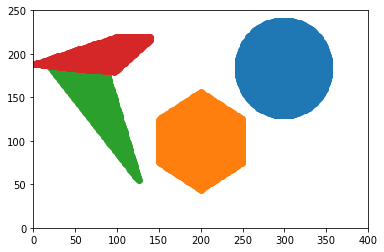

In [557]:
import matplotlib.pyplot as plt
plt.scatter(x_c, y_c)
plt.scatter(x_h, y_h)
plt.scatter(x_t1, y_t1)
plt.scatter(x_t2, y_t2)
plt.axis([0, 400, 0, 250])
plt.show



Take the input from user

In [558]:

initial()
##goal_cost = np.inf
while(1):
    if (Open_list.qsize()>0):
        

        print('inside while')
        node =pop(Closed_list, Open_list, All_list)
        if type(node) == str:
            print('done')
            break
        else:
            print('popped')

        # print('closed list', len(Closed_list))
        # print('openlist', len(Open_list))
            movement(node, All_list, Open_list)
            # print('check is', check)
        #     if(check!=None):
        #         print('mila na')
        #         goal_cost = All_list[int(map_obs4[goal_location[0],goal_location[1]]-1)].cost

        #         print('goal cost is', goal_cost)
        # else:
        #     print('cost exceeded')
        #     break
    
    else:
        print('open list empty')
        break
    
       


inside while
closed list updated
popped
9 8


AttributeError: 'Node' object has no attribute 'cost'

In [ ]:
Open_list.qsize()

In [ ]:
len(All_list)

In [ ]:
len(allp_map)

Backtracking

In [ ]:
if (map_obs4[goal_location[0], goal_location[1]]!=-1 and map_obs4[goal_location[0], goal_location[1]]!=-2 ):
    x_a = []
    y_a = []
    backtrack(All_list, x_a, y_a)
    mp.show()
    mp.axis([0, 400, 0, 250])
    mp.plot(y_a,x_a)
    mp.plot(x_nc, y_nc)
    mp.plot(x_t1_nc,y_t1_nc)
    mp.plot(x_t2_nc,y_t2_nc)
    mp.plot(x_h_nc,y_h_nc)
else:
    print('cannot be back tracked')

Priority queueu has a problem with objects (try any other method): check once

Put animation here

In [ ]:
len(allp_map)

In [ ]:
%matplotlib inline
import pygame
import cv2
import numpy as np
#defining a blank canvas
new_canvas = np.zeros((250,400,3),np.uint8)
# allp_map = [] 
#for every point that belongs within the obstacle
# allp_map.append([y_nc,x_nc])
# allp_map.append([y_h_nc, x_h_nc]) 
# allp_map.append([y_t1_nc, x_t1_nc]) 
# allp_map.append[y_t2_nc, x_t2_nc]

for c in allp_map: #change the name of the variable l
    x = c[0]
    y = c[1]
    new_canvas[(y,x)]=[0,255,255] #assigning a yellow coloured pixel
#flipping the image for correct orientation
new_canvas = np.flipud(new_canvas)
#making a copy for backtracking purpose
new_canvas_copy_backtrack = new_canvas.copy()
#making a copy for showing the visited nodes on the obstacle space
#can be used for the animation
new_canvas_copy_visited = new_canvas.copy()
new_canvas_copy_visited = cv2.resize(new_canvas_copy_visited,(600,400))
#showing the obstacle map
mp.imshow('new_canvas',new_canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
pygame.init()

display_width = 400
display_height = 250

gameDisplay = pygame.display.set_mode((display_width,display_height),pygame.FULLSCREEN)
pygame.display.set_caption('Covered Nodes- Animation')

black = (0,0,0)
white = (0,255,255)
#new = np.array(new_canvas_copy_visited)
surf = pygame.surfarray.make_surface(new_canvas_copy_visited)

clock = pygame.time.Clock()
done = False
while not done:
    for event in pygame.event.get():   
        if event.type == pygame.QUIT:  
            done = True   
 
    gameDisplay.fill(black)
    for path in visited:
        if path not in new_canvas_copy_visited:
            #pygame.time.wait(1)
            #time.sleep(0.000005)
            x = path[0]
            y = abs(200-path[1])
            #gameDisplay.blit(surf, (x,y))
            #gameDisplay.fill(white)
            pygame.draw.rect(gameDisplay, white, [x,y,1,1])
            #pygame.time.wait(1)
            pygame.display.flip()
    for path in backtracked_final:
        
        pygame.time.wait(5)
        #time.sleep(0.00005)
        x = path[0]
        y = abs(200-path[1])
        #gameDisplay.blit(surf, (x,y))
        #gameDisplay.fill(white)
        pygame.draw.rect(gameDisplay, (0,0,255), [x,y,1,1])
        #pygame.time.wait(1)
        pygame.display.flip()
        
    #pygame.time.wait(14)
    done = True
pygame.quit()


In [ ]:


# # In[ ]:


# #visited path
# for path in visited:
#     #print(path)
#     x = path[0]
#     y = path[1]
#     new_canvas_copy_backtrack[(200-y,x)]=[255,0,0] #setting every backtracked pixel to white
# #showing the final backtracked path
# new_backtracked = cv2.resize(new_canvas_copy_backtrack,(600,400))
# cv2.imshow('visited',new_backtracked)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# # In[ ]:


# #backtracked path
# for path in backtracked_final:
#     x = path[0]
#     y = path[1]
#     new_canvas_copy_backtrack[(200-y,x)]=[0,255,0] #setting every backtracked pixel to green
# #showing the final backtracked path
# new_backtracked = cv2.resize(new_canvas_copy_backtrack,(600,400))
# cv2.imshow('new_backtracked',new_backtracked)
# cv2.waitKey(0)
# cv2.destroyAllWindows()